In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load in the data

feast = pd.read_csv('data/mr_feast_views.csv')
feast = feast.drop_duplicates()
feast = feast.reset_index(drop=True) # drop the old index and replace with a new one
feast = feast.drop('License', axis=1) # drop the License column
feast.head()

,video_id,category,views,days_since_release,views_change
0,VG916,Reaction,2108373.0,27,2108373.0
1,VG916,Reaction,2543481.0,28,435108.0
2,VG916,Reaction,3084828.0,29,541347.0
3,VG916,Reaction,3784331.0,30,699503.0
4,VG916,Reaction,3850877.0,31,66546.0


What do you think the difference between views and views_change is?

Click here for the solution

<p style=color:white>
    views is the cumulative total of views up to that point
    views_change is the number of new views on the video that day
</p>

In [5]:
# Group data by category to sum up total views 
# Since views_change represents the number of new views per day, it makes sense to use this column for summing total views
# If we used views, we would be effectively be duplicating our information

grouped_sum=feast.groupby('category').sum()
grouped_sum

,views,days_since_release,views_change
category,,,
Advert,2011739.0,1463,300328.0
Challenge,237152538.0,1295,41564908.0
Reaction,592624667.0,3311,101129961.0
Vlog,11368823.0,287,1758434.0


Text(0.5, 0, 'Category')

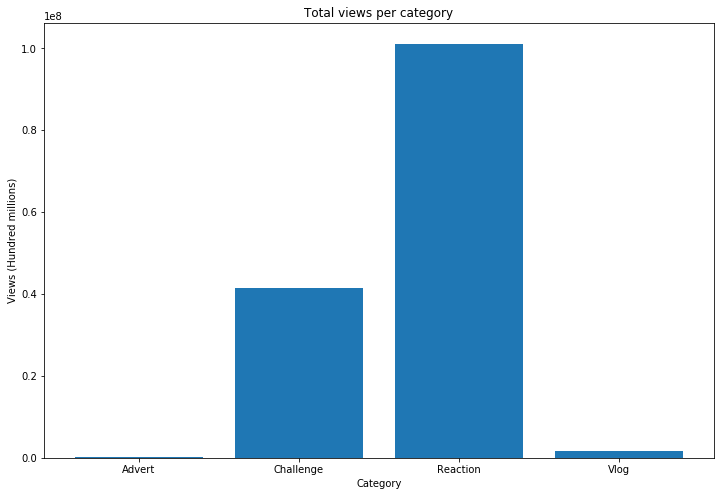

In [6]:
# bar chart to show total views per category

fig,ax=plt.subplots(figsize=(12,8))
ax.bar(grouped_sum.index,grouped_sum.views_change)
#ax.bar(grouped_sum.index,grouped_sum.views_change,width=0.5,color=['red','blue','purple','green'],edgecolor='yellow')
ax.set_title('Total views per category')
ax.set_ylabel('Views (Hundred millions)')
ax.set_xlabel('Category')

# Note the line of text above the visualization, if you want to remove this, end the block of code with a semicolon (;)

# Even when you are doing exploratory data analysis, it is good practice to label your axes
# Ideally, you should also have a title

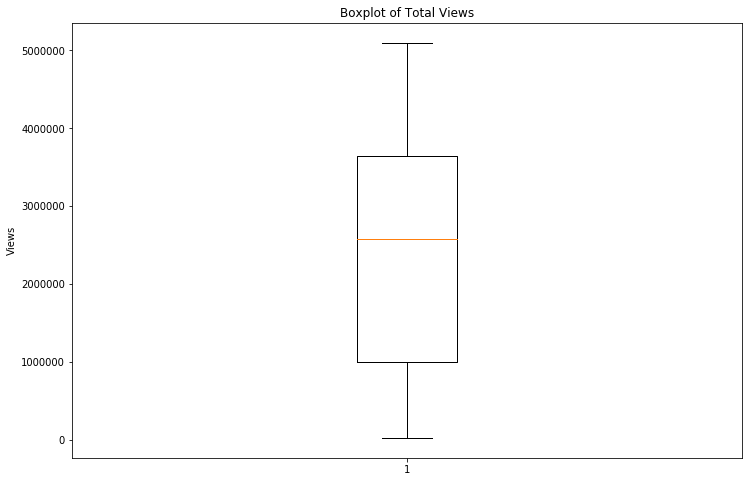

In [7]:
# boxplot to show total views, difficult to compare categories
fig,ax=plt.subplots(figsize=(12,8))
ax.boxplot(feast.views)
#ax.boxplot(feast.views,showmeans=True,vert=False)
ax.set_title('Boxplot of Total Views')
ax.set_ylabel('Views');

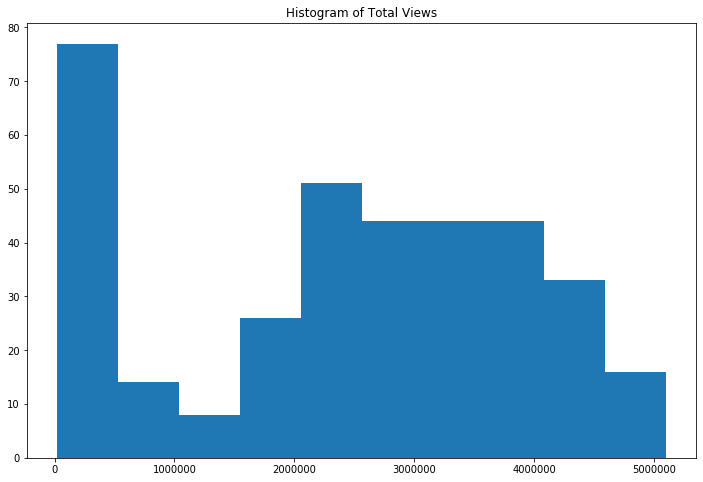

In [8]:
# histogram to check distribution
fig,ax=plt.subplots(figsize=(12,8))
ax.hist(feast.views)
#x.hist(feast.views,bins=100)
ax.set_title('Histogram of Total Views');

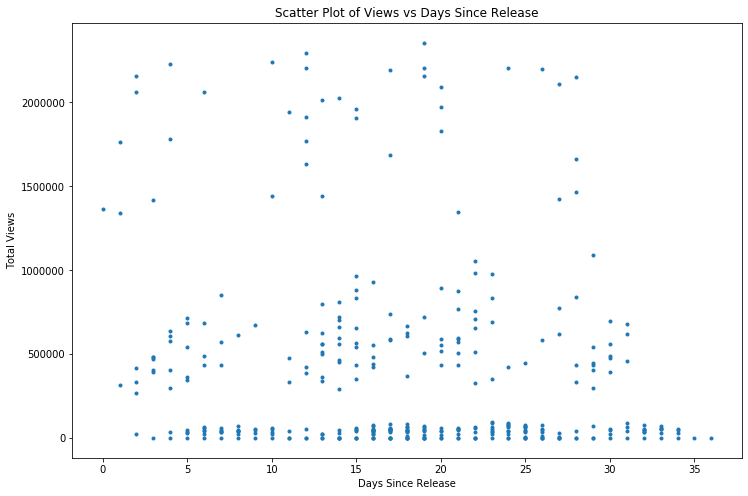

In [9]:
# scatter plot to check correlation
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(feast.days_since_release,feast.views_change,'.')
#ax.plot(feast.days_since_release,feast.views_change,'+',color='red',markersize=20)
ax.set_title('Scatter Plot of Views vs Days Since Release')
ax.set_ylabel('Total Views')
ax.set_xlabel('Days Since Release');

# Note the '.', this instructs the plot to make it scattered. Try removing it, what happens?
# What would happen if you changed it to '+'?

In [10]:
# create subset of just reaction videos so we can make a line graph

react_vids=feast[feast.category=='Reaction'].sort_values(by='days_since_release').reset_index(drop=True)

# group videos by days since release so it is a function of time

grouped_react= react_vids.groupby('days_since_release').sum()

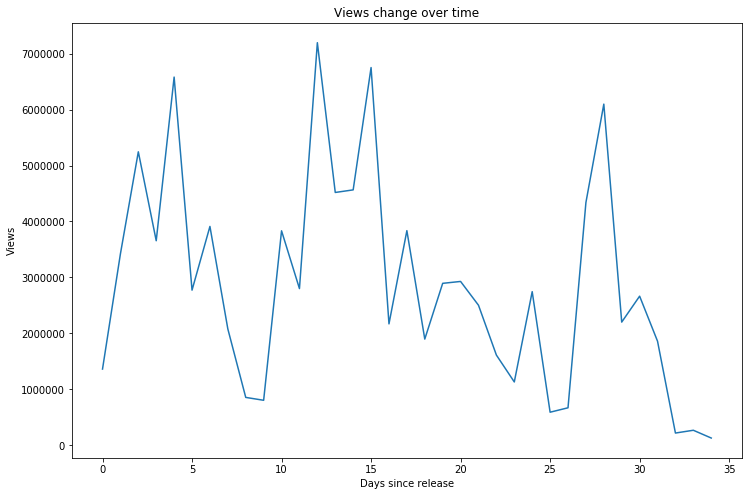

In [18]:
# line graph to check trends, what do the spikes represent?

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(grouped_react.index,grouped_react.views_change)
#ax.plot(grouped_react.index,grouped_react.views_change,linestyle='--')
ax.set_title('Views change over time')
ax.set_ylabel('Views')
ax.set_xlabel('Days since release')
#ax.vlines(x=20,ymin=0,ymax=grouped_react.views_change.max(), color='red', linestyle='--')
plt.show()

## Seaborn

Seaborn is another library known for attractive visualizations. Its named after Sam Seaborn, a character in the West Wing played by Rob Lowe, a man known for being very attractive. It has similar syntax to matplotlib, but allows us to make more interesting visualization.

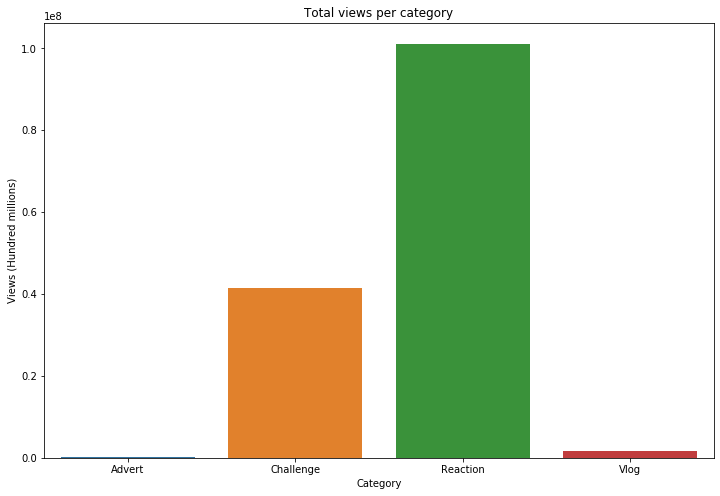

In [11]:
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(x=grouped_sum.index,y='views_change',data=grouped_sum,ax=ax)
ax.set_title('Total views per category')
ax.set_ylabel('Views (Hundred millions)')
ax.set_xlabel('Category');

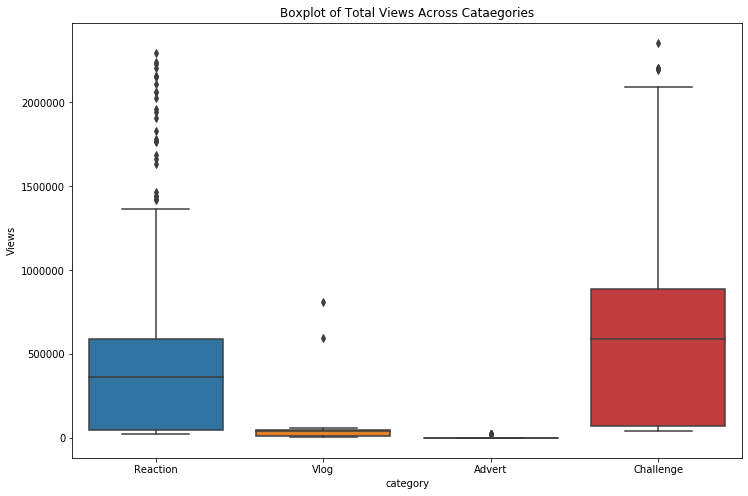

In [12]:
# Easier to compare categories in boxlots
fig,ax=plt.subplots(figsize=(12,8))
sns.boxplot(x='category',y='views_change',data=feast,ax=ax)
ax.set_title('Boxplot of Total Views Across Cataegories')
ax.set_ylabel('Views');

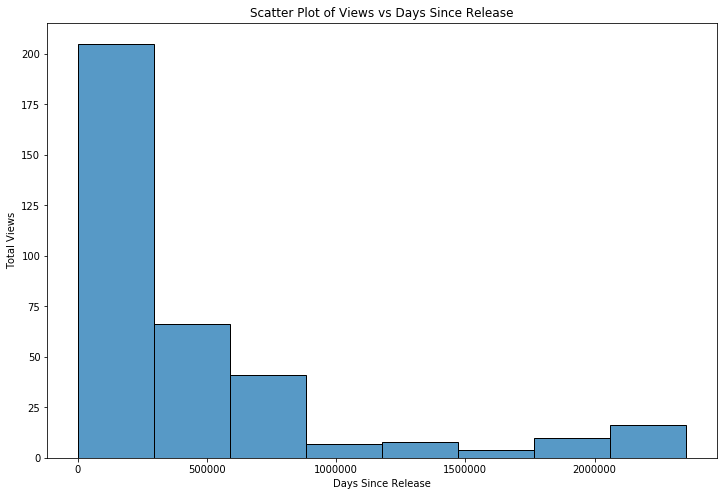

In [13]:
# histplot requires seaborn version 0.11.2
fig,ax=plt.subplots(figsize=(12,8))
sns.histplot(feast.views_change,bins=8,ax=ax)
ax.set_title('Scatter Plot of Views vs Days Since Release')
ax.set_ylabel('Total Views')
ax.set_xlabel('Days Since Release');

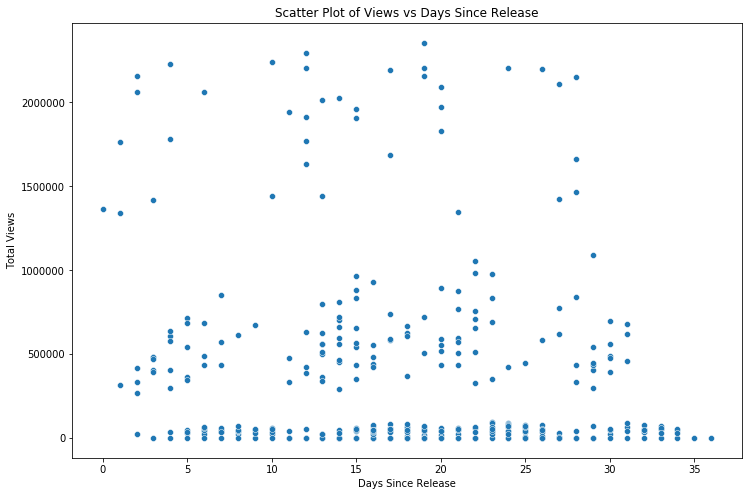

In [14]:
# scatter plots can be aggregated to show different categories
fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(x='days_since_release',y='views_change',data=feast,ax=ax)
#sns.scatterplot(x='days_since_release',y='views_change',data=feast,hue='category',ax=ax)
ax.set_title('Scatter Plot of Views vs Days Since Release')
ax.set_ylabel('Total Views')
ax.set_xlabel('Days Since Release');


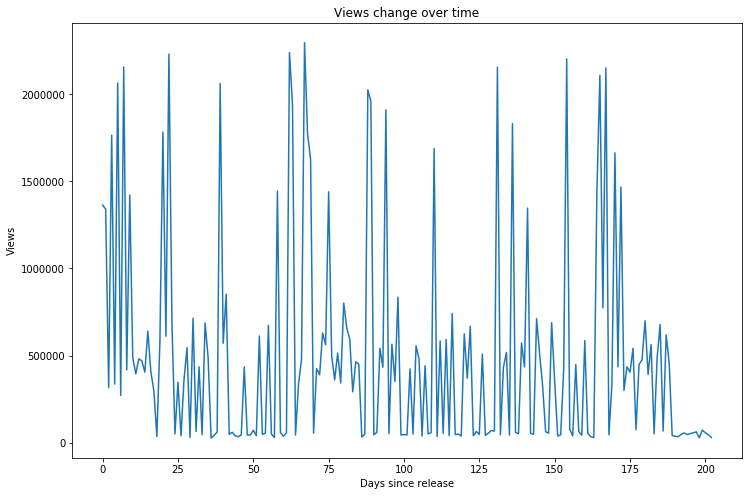

In [15]:
# line graph
fig,ax=plt.subplots(figsize=(12,8))
sns.lineplot(x=react_vids.index,y=react_vids.views_change,ax=ax)
ax.set_title('Views change over time')
ax.set_ylabel('Views')
ax.set_xlabel('Days since release');

## Practice

In [5]:
#1: Produce a visualization that compares the average daily views for each vlog


In [3]:
#2: Produce a visualization that compares the minimum number of daily views for each category of video


In [4]:
#3: Produce a visualization that compares the trends in views for each category of video


In [2]:
#4: Produce a visualization that for videos older than 7 days, compares the age and the daily views


In [1]:
#4 stretch. Investigate how to plot a trend line on the previous visualization
import numpy as np


In [25]:
#5: Explore the seaborn library, what other visualizations can you discover?